## SRI Model

$$
\begin{cases}
\frac{ds}{dt} = f(s(t), i(t)) = -\beta is \\
\frac{di}{dt} = g(s(t), i(t)) = \beta is - \gamma i
\end{cases}
$$


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Euler

In [2]:
def sir(s0,i0, parameters, time, dt, func, tolerance=1e-6, max_iterations=150, show_iter = False):
    n_steps = len(time)

    s = np.zeros_like(time)
    i = np.zeros_like(time)
    r = np.zeros_like(time)
    iter_count = np.zeros(n_steps, dtype=int)
    first_iteration = {"S_n1":[], "I_n1":[]}

    s[0] = s0
    i[0] = i0
    r[0] = 1.0 - s[0] - i[0]

    print(n_steps)
    for n in range(n_steps-1):
        current_s = s[n]
        current_i = i[n]

        i_mu = current_i
        s_mu = current_s

        converged = False
        for k in range(1, max_iterations):
            s_next, i_next = func(current_s, current_i, s_mu, i_mu, dt, parameters)

            if n==0:
                first_iteration['S_n1'].append(s_next)
                first_iteration['I_n1'].append(i_next)



            if (np.abs(s_next - s_mu) < tolerance) and (np.abs(i_next - i_mu) < tolerance):
                s[n+1] = s_next
                i[n+1] = i_next
                r[n+1] = 1.0 - s_next - i_next
                iter_count[n+1] = k
                converged = True
                break

            s_mu, i_mu = s_next, i_next


        if not converged:
            s[n+1] = s_next
            i[n+1] = i_next
            r[n+1] = 1.0 - s_next - i_next
            iter_count[n+1] = max_iterations

        if show_iter:
            print(f"Iters in {n}th step: {iter_count[n]}")

        if n==1:
            df_fr = pd.DataFrame(first_iteration)
            print(df_fr)

    return s, i, r, iter_count



def euler(s_n, i_n, s_mu, i_mu, dt, params):
    beta = params['beta']
    gamma = params['gamma']

    s_next = s_n - dt * beta * s_mu * i_mu
    i_next = i_n + dt * (beta * s_mu * i_mu - gamma * i_mu)

    return s_next, i_next


### Calculation for $\Delta t = 10$


36
Iters in 0th step: 0
Iters in 1th step: 128
         S_n1      I_n1
0    0.594000  0.336000
1    0.221414  0.543386
2    0.490934  0.128696
3    0.685184  0.224729
4    0.376466  0.466224
..        ...       ...
123  0.414591  0.344358
124  0.414590  0.344359
125  0.414589  0.344360
126  0.414590  0.344358
127  0.414590  0.344359

[128 rows x 2 columns]
Iters in 2th step: 108
Iters in 3th step: 49
Iters in 4th step: 27
Iters in 5th step: 18
Iters in 6th step: 14
Iters in 7th step: 19
Iters in 8th step: 20
Iters in 9th step: 20
Iters in 10th step: 19
Iters in 11th step: 19
Iters in 12th step: 18
Iters in 13th step: 17
Iters in 14th step: 16
Iters in 15th step: 15
Iters in 16th step: 14
Iters in 17th step: 13
Iters in 18th step: 13
Iters in 19th step: 12
Iters in 20th step: 11
Iters in 21th step: 10
Iters in 22th step: 9
Iters in 23th step: 8
Iters in 24th step: 7
Iters in 25th step: 6
Iters in 26th step: 5
Iters in 27th step: 4
Iters in 28th step: 3
Iters in 29th step: 2
Iters in 30t

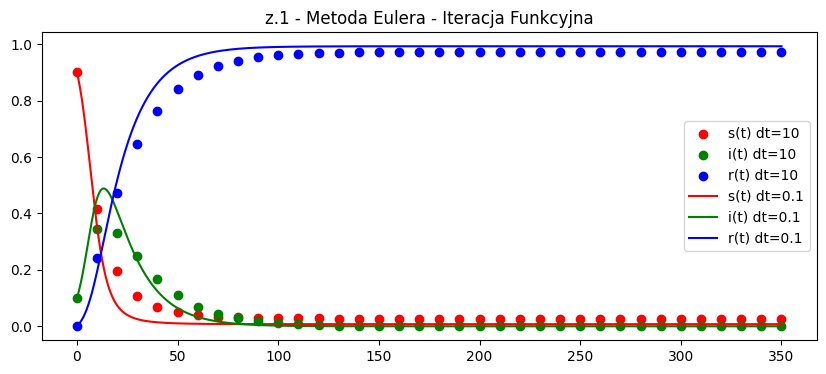

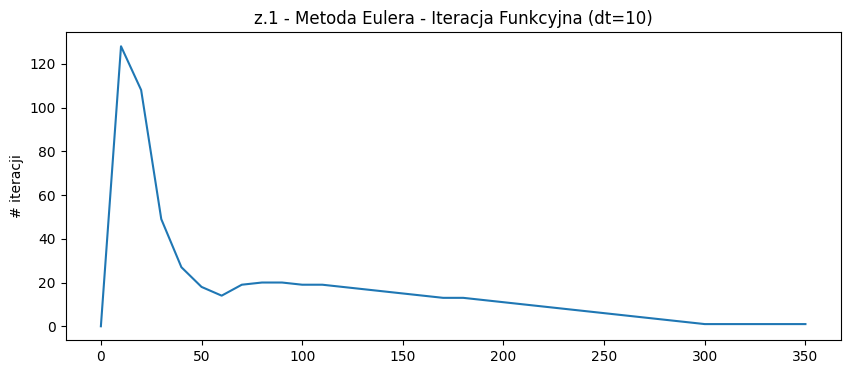

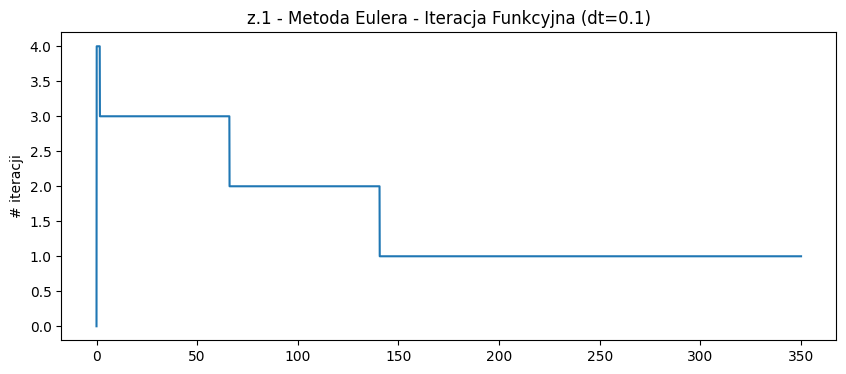

In [3]:
parameters = {
    'beta': 0.34,
    'gamma': 0.07,
}

show_iter = True
i0, s0 = 0.1, 0.9

dt = 10
time10 = np.arange(start=0.0, stop=350.1, step=dt)

ddt = 0.1
time01 = np.arange(start=0.0, stop=350.01, step=ddt)

s10,i10,r10,iter_count10 = sir(s0, i0, parameters, time10, dt, euler, show_iter = True)
s01, i01, r01, iter_count01 = sir(s0,i0, parameters, time01, ddt, euler)

plt.figure(figsize=(10,4))
plt.scatter(time10, s10, label="s(t) dt=10", color="red")
plt.scatter(time10, i10, label="i(t) dt=10", color="green")
plt.scatter(time10, r10, label="r(t) dt=10", color="blue")

plt.plot(time01, s01, label="s(t) dt=0.1", color="red")
plt.plot(time01, i01, label="i(t) dt=0.1", color="green")
plt.plot(time01, r01, label="r(t) dt=0.1", color="blue")

plt.legend()
plt.title("z.1 - Metoda Eulera - Iteracja Funkcyjna")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(time10, iter_count10)
plt.title("z.1 - Metoda Eulera - Iteracja Funkcyjna (dt=10)")
plt.ylabel("# iteracji")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(time01, iter_count01)
plt.title("z.1 - Metoda Eulera - Iteracja Funkcyjna (dt=0.1)")
plt.ylabel("# iteracji")
plt.show()


## Trapezoid Funcional


In [4]:
def trapezoid_func(s_n, i_n, s_mu, i_mu, dt, params):
    beta = params['beta']
    gamma = params['gamma']

    s_next = s_n - (dt/2) * (beta*s_n*i_n + beta*s_mu*i_mu)
    i_next = i_n + (dt/2) * (beta*s_n*i_n - gamma*i_n + beta*s_mu*i_mu - gamma*i_mu)

    return s_next, i_next


36
Iters in 0th step: 0
Iters in 1th step: 18
        S_n1      I_n1
0   0.594000  0.336000
1   0.407707  0.439693
2   0.442248  0.368860
3   0.469683  0.366216
4   0.454591  0.382234
5   0.451608  0.379610
6   0.455561  0.376576
7   0.455360  0.377839
8   0.454511  0.378246
9   0.454742  0.377872
10  0.454882  0.377863
11  0.454799  0.377949
12  0.454786  0.377932
13  0.454807  0.377917
14  0.454805  0.377924
15  0.454801  0.377926
16  0.454802  0.377924
17  0.454803  0.377924
Iters in 2th step: 22
Iters in 3th step: 16
Iters in 4th step: 12
Iters in 5th step: 12
Iters in 6th step: 12
Iters in 7th step: 11
Iters in 8th step: 10
Iters in 9th step: 10
Iters in 10th step: 9
Iters in 11th step: 8
Iters in 12th step: 8
Iters in 13th step: 7
Iters in 14th step: 6
Iters in 15th step: 6
Iters in 16th step: 5
Iters in 17th step: 4
Iters in 18th step: 4
Iters in 19th step: 3
Iters in 20th step: 2
Iters in 21th step: 2
Iters in 22th step: 1
Iters in 23th step: 1
Iters in 24th step: 1
Iters in 25

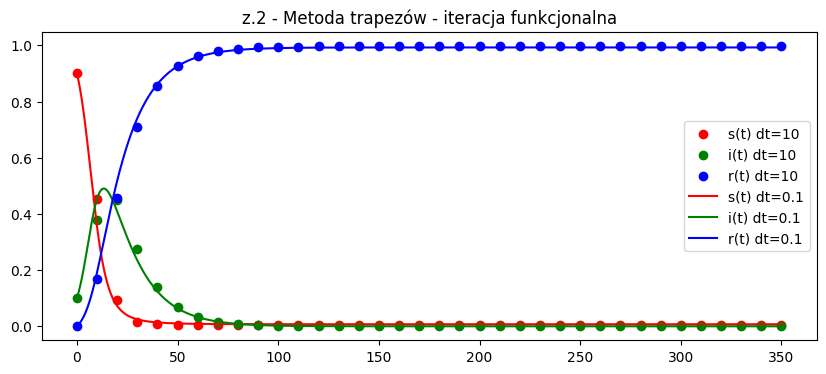

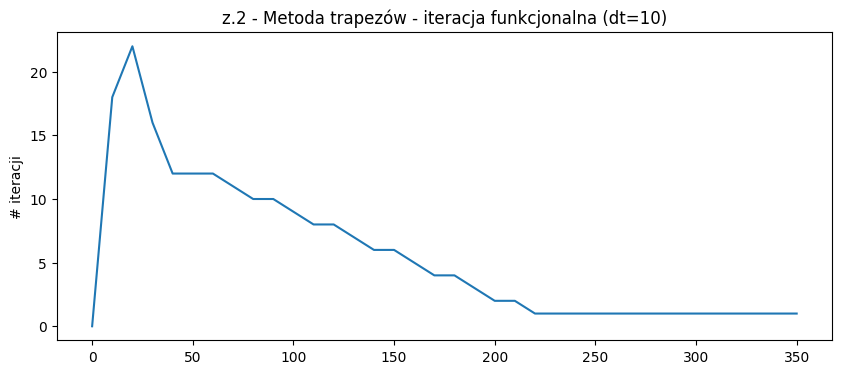

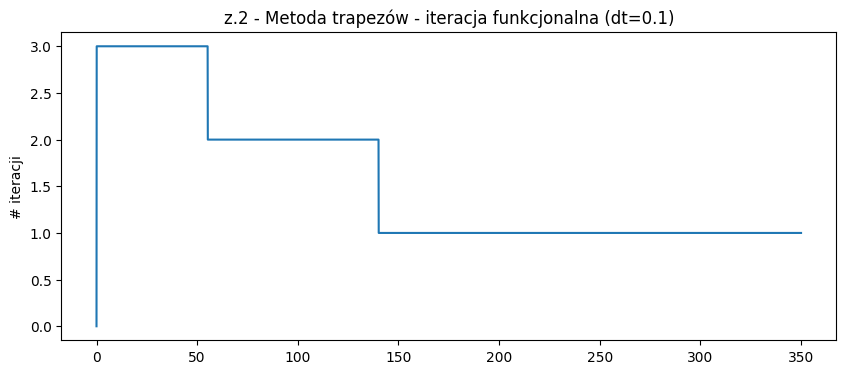

In [5]:
s10,i10,r10,iter_count10 = sir(s0, i0, parameters, time10, dt, func = trapezoid_func,  show_iter = True)
s01, i01, r01, iter_count01 = sir(s0,i0, parameters, time01, ddt, func = trapezoid_func)

plt.figure(figsize=(10,4))
plt.scatter(time10, s10, label="s(t) dt=10", color="red")
plt.scatter(time10, i10, label="i(t) dt=10", color="green")
plt.scatter(time10, r10, label="r(t) dt=10", color="blue")

plt.plot(time01, s01, label="s(t) dt=0.1", color="red")
plt.plot(time01, i01, label="i(t) dt=0.1", color="green")
plt.plot(time01, r01, label="r(t) dt=0.1", color="blue")

plt.legend()
plt.title("z.2 - Metoda trapezów - iteracja funkcjonalna")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(time10, iter_count10)
plt.title("z.2 - Metoda trapezów - iteracja funkcjonalna (dt=10)")
plt.ylabel("# iteracji")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(time01, iter_count01)
plt.title("z.2 - Metoda trapezów - iteracja funkcjonalna (dt=0.1)")
plt.ylabel("# iteracji")
plt.show()

## Trapezoid Newtwon

In [11]:
def sir_trpezoid_newton(s0,i0, parameters, time, dt, func=trapezoid_func, tolerance=1e-6, max_iterations=150, show_iter = False):
    beta = parameters['beta']
    gamma = parameters['gamma']

    n_steps = len(time)

    s = np.zeros_like(time)
    i = np.zeros_like(time)
    r = np.zeros_like(time)
    iter_count = np.zeros(n_steps, dtype=int)
    first_iteration = {"S_n1":[], "I_n1":[]}

    s[0] = s0
    i[0] = i0
    r[0] = 1.0 - s[0] - i[0]

    print(n_steps)
    for n in range(n_steps-1):
        current_s = s[n]
        current_i = i[n]

        i_mu = current_i
        s_mu = current_s

        converged = False
        for k in range(1, max_iterations+1):
            s_next, i_next = func(current_s, current_i, s_mu, i_mu, dt, parameters)


            #Iteracja Newtona
            F = s_next - current_s + (dt/2) * (beta*current_s*current_i + beta*s_next*i_next)

            G = i_next - current_i - (dt/2) * ((beta*current_s*current_i - gamma*current_i) + (beta*s_next*i_next - gamma*i_next))

            J11 = 1 + (dt/2)*beta*i_next
            J12 = (dt/2)*beta*s_next

            J21 = -(dt/2)*(beta*i_next)
            J22 = 1 - (dt/2)*(beta*s_next - gamma)

            w = J11 * J22 - J12 * J21
            w_s = F * J22 - J12 * G
            w_i = J11 * G - F * J21

            if abs(w) < 1e-14:
                break;

            delta_s = w_s/w
            delta_i = w_i/w

            s_next = s_next - delta_s
            i_next = i_next - delta_i



            if n==0:
                first_iteration['S_n1'].append(s_next)
                first_iteration['I_n1'].append(i_next)



            if (abs(delta_i) < tolerance) and (abs(delta_s) < tolerance):
                s[n+1] = s_next
                i[n+1] = i_next
                r[n+1] = 1.0 - s_next - i_next
                iter_count[n+1] = k
                converged = True
                break

            s_mu, i_mu = s_next, i_next


        if not converged:
            s[n+1] = s_next
            i[n+1] = i_next
            r[n+1] = 1.0 - s_next - i_next
            iter_count[n+1] = max_iterations

        if show_iter:
            print(f"Iters in {n}th step: {iter_count[n]}")

        if n==1:
            df_fr = pd.DataFrame(first_iteration)
            print(df_fr)

    return s, i, r, iter_count

36
Iters in 0th step: 0
Iters in 1th step: 4
       S_n1      I_n1
0  0.442751  0.386851
1  0.454796  0.377929
2  0.454803  0.377924
3  0.454803  0.377924
Iters in 2th step: 4
Iters in 3th step: 3
Iters in 4th step: 3
Iters in 5th step: 3
Iters in 6th step: 3
Iters in 7th step: 2
Iters in 8th step: 2
Iters in 9th step: 2
Iters in 10th step: 2
Iters in 11th step: 2
Iters in 12th step: 2
Iters in 13th step: 2
Iters in 14th step: 2
Iters in 15th step: 2
Iters in 16th step: 2
Iters in 17th step: 2
Iters in 18th step: 2
Iters in 19th step: 2
Iters in 20th step: 1
Iters in 21th step: 1
Iters in 22th step: 1
Iters in 23th step: 1
Iters in 24th step: 1
Iters in 25th step: 1
Iters in 26th step: 1
Iters in 27th step: 1
Iters in 28th step: 1
Iters in 29th step: 1
Iters in 30th step: 1
Iters in 31th step: 1
Iters in 32th step: 1
Iters in 33th step: 1
Iters in 34th step: 1
3501
       S_n1      I_n1
0  0.896909  0.102383
1  0.896909  0.102383


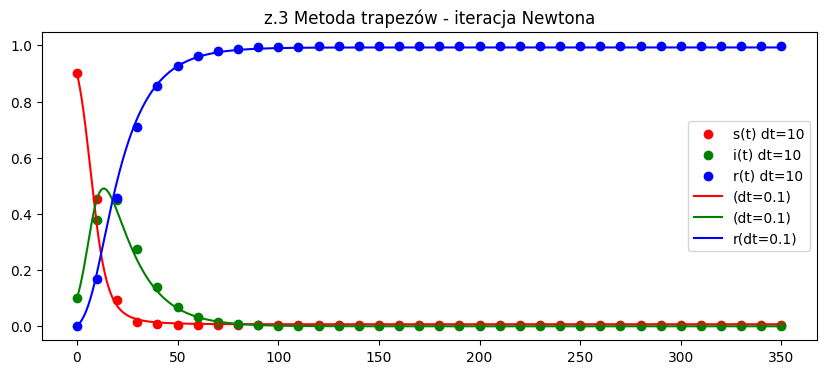

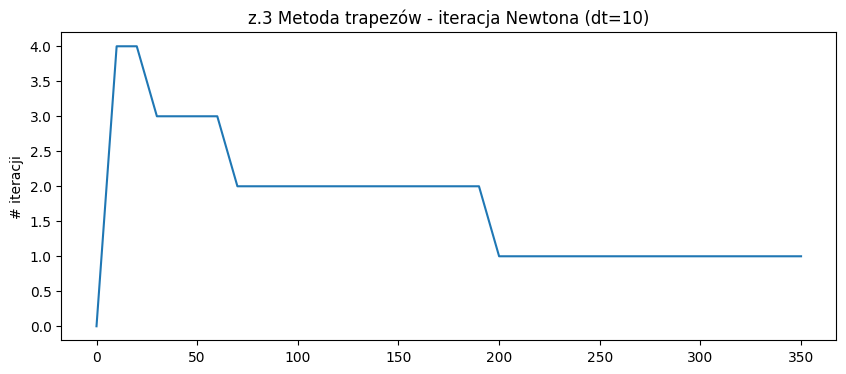

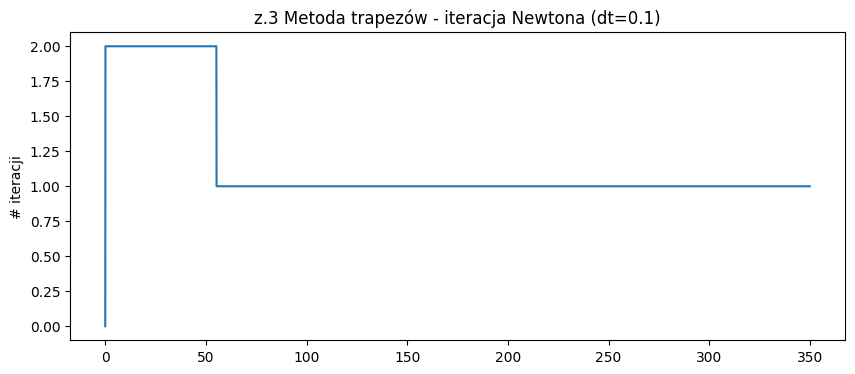

In [12]:
s10,i10,r10,iter_count10 = sir_trpezoid_newton(s0, i0, parameters, time10, dt, show_iter=True)
s01, i01, r01, iter_count01 = sir_trpezoid_newton(s0,i0, parameters, time01, ddt)

plt.figure(figsize=(10,4))
plt.scatter(time10, s10, label="s(t) dt=10", color="red")
plt.scatter(time10, i10, label="i(t) dt=10", color="green")
plt.scatter(time10, r10, label="r(t) dt=10", color="blue")

plt.plot(time01, s01, label="(dt=0.1)", color="red")
plt.plot(time01, i01, label="(dt=0.1)", color="green")
plt.plot(time01, r01, label="r(dt=0.1)", color="blue")

plt.legend()
plt.title("z.3 Metoda trapezów - iteracja Newtona")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(time10, iter_count10)
plt.title("z.3 Metoda trapezów - iteracja Newtona (dt=10)")
plt.ylabel("# iteracji")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(time01, iter_count01)
plt.title("z.3 Metoda trapezów - iteracja Newtona (dt=0.1)")
plt.ylabel("# iteracji")
plt.show()

## Trapezod functional for $\beta = 0.06$

36
       S_n1      I_n1
0  0.846000  0.084000
1  0.851681  0.083919
2  0.851558  0.084070
3  0.851523  0.084053
4  0.851528  0.084053
5  0.851528  0.084053


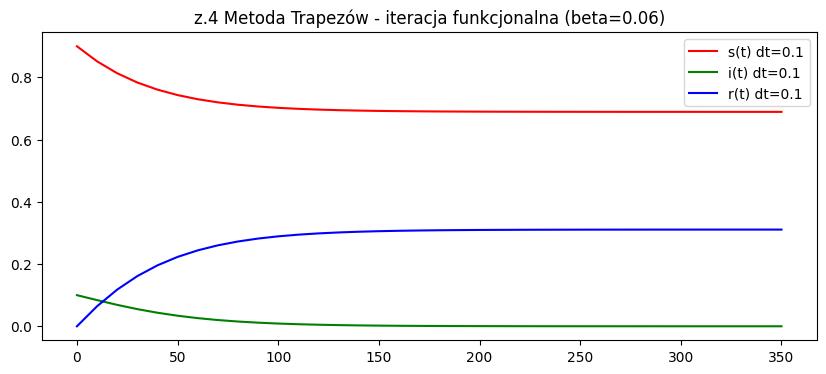

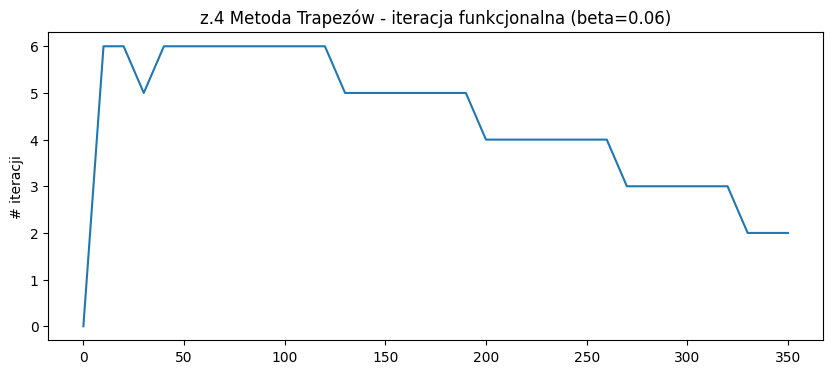

In [14]:
# Wzadaniu dt = 0.1 Wykres z odpowiedzią dla dt=10.

params2 = parameters.copy()
params2['beta'] = 0.06
s01, i01, r01, iter_count01 = sir(s0,i0, params2, time10, dt, func = trapezoid_func)


plt.figure(figsize=(10,4))
plt.plot(time10, s01, label="s(t) dt=0.1", color="red")
plt.plot(time10, i01, label="i(t) dt=0.1", color="green")
plt.plot(time10, r01, label="r(t) dt=0.1", color="blue")

plt.legend()
plt.title("z.4 Metoda Trapezów - iteracja funkcjonalna (beta=0.06)")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(time10, iter_count01)
plt.title("z.4 Metoda Trapezów - iteracja funkcjonalna (beta=0.06)")
plt.ylabel("# iteracji")
plt.show()